In [74]:
import pandas as pd
from strategy import Strategy
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = Strategy.load_dataset()
df = df.rename(columns={
        f"bet365_1X2 Full Time_outcome_{i}_closing_value": f"bet365_{i}" for i in range(1, 4)
})
def cpt_winner(g1, g2):
        if g1 > g2:
            return 1
        elif g1 < g2:
            return 3
        else:
            return 2
df['result'] = df[['score_ft_1', 'score_ft_2']].apply(lambda x: cpt_winner(x[0], x[1]), axis=1)


In [120]:
STRATEGY_PATH = 'strategies/strategy_3M_H_G_rank_1__3M_A_GA_rank_2__2.json'

In [121]:
strategy = Strategy.load_strategy_from_file(STRATEGY_PATH)
strategy

{'3M_H_G_rank_1': [4, 7],
 '3M_A_GA_rank_2': [5, 9],
 'result': 2,
 'bet365_2': [5.540000000000001, 7.800000000000001]}

In [122]:
matches, gain_by_year = Strategy.analyze_strategy(strategy, df)
result = strategy.get('result')
matches = matches.reset_index()
print(f'Number of matches: {len(matches)}')
print(f'Total revenue (with 1 euro bets): {matches.gain.sum()}')
print(f'ROI: {matches.gain.sum() / len(matches) * 100}%')
print(f'Winning bets: {len(matches[matches.result == result])}')
print(f'Winning rate: {len(matches[matches.result == result]) / len(matches) * 100} %')
print(f"Average odd: {matches[f'bet365_{result}'].mean()}")

Number of matches: 209
Total revenue (with 1 euro bets): 83.75
ROI: 40.07177033492823%
Winning bets: 46
Winning rate: 22.00956937799043 %
Average odd: 6.444976076555024


<AxesSubplot:>

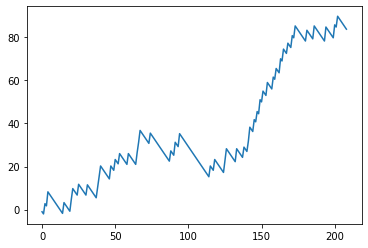

In [123]:
matches.cum_gain.plot()

<AxesSubplot:xlabel='year'>

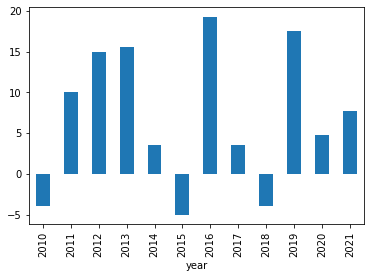

In [124]:
gain_by_year.plot.bar()

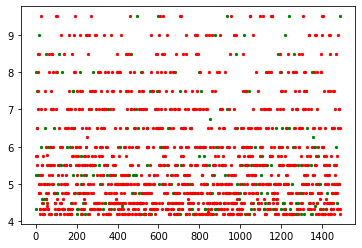

In [117]:
plt.scatter(x = matches[matches.gain > 0].index, y=matches[matches.gain > 0][f"bet365_{strategy.get('result')}"], s=5, color='green')
plt.scatter(x = matches[matches.gain < 0].index, y=matches[matches.gain < 0][f"bet365_{strategy.get('result')}"], color='red', s=5)

<AxesSubplot:xlabel='country'>

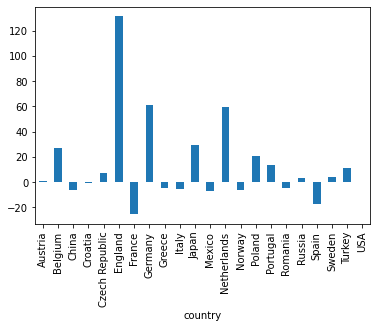

In [118]:
gain_by_country = matches.groupby(by='country')["gain"]
gain_by_country.sum().plot.bar()

<AxesSubplot:xlabel='league'>

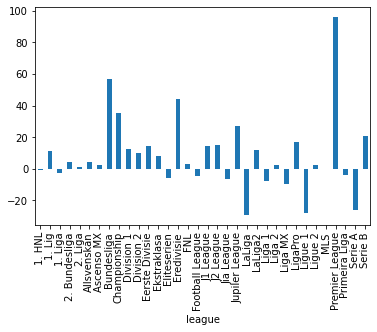

In [119]:
gain_by_league = matches.groupby(by='league')["gain"].sum()
gain_by_league.plot.bar()